<a href="https://colab.research.google.com/github/asyifafreda/asyifafreda/blob/main/LevelGold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('data.csv', encoding='latin-1')
print("shape: ", data.shape)
data.head()

shape:  (13169, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [3]:
abusive=pd.read_csv('abusive.csv', encoding='latin-1')
print("shape: ", abusive.shape)
abusive.head()

shape:  (125, 1)


,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing


In [4]:
kamusalay=pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)
kamusalay=kamusalay.rename(columns={0: 'eksisting',
                                    1: 'revisi'})
print("shape: ", kamusalay.shape)
kamusalay.head()

shape:  (15167, 2)


,eksisting,revisi
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [5]:
import re

In [6]:
def lowercase(text):
    return text.lower()

def remove_unecessarychar(text):
    text = re.sub('\n', '', text)
    text = re.sub('rt', ' ', text)
    text = re.sub('user', ' ', text)
    text = re.sub('((www.\.[^\s]+)|(https?://[^\s]+)|(https?://[^\s]+))', ' ', text)
    text = re.sub('  +', ' ',text)
    return text

def remove_unicode(text):
    text = re.sub(r'\bx[a-fA-F0-9]{2}\b', '', text)
    text = re.sub(r'\bx(a-fA-F0-9]{2})', '', text)
    return text

def remove_nonalphanumeric(text):
    text = re.sub(r'[^0-9a-zA-Z]+', ' ', text)
    return text

def remove_extraspaces(text):
    text = re.sub(r'\s+', ' ', text)
    return text

kamusalay_map=dict(zip(kamusalay['eksisting'], kamusalay['revisi']))
def revisi(text):
    return ' '.join([kamusalay_map[word] if word in kamusalay_map else word for word in text.split(' ')])

In [7]:
def preprocess(text):
    text = revisi(text)
    text = lowercase(text)
    text = remove_extraspaces(text)
    text = remove_nonalphanumeric(text)
    text = remove_unicode(text)
    text = remove_unecessarychar(text)
    return text

In [8]:
data['Tweet']=data['Tweet'].apply(preprocess)
print ("shape: ", data.shape)
data.head()

shape:  (13169, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,di saat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat memberi tau elu edan sarap g...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kadang aku berfikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0
3,aku itu aku n nku tau matamu sipit tapi dilia...,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebong kafir sudah kelihatan dongoknya d...,1,1,0,1,1,0,0,0,0,0,1,0


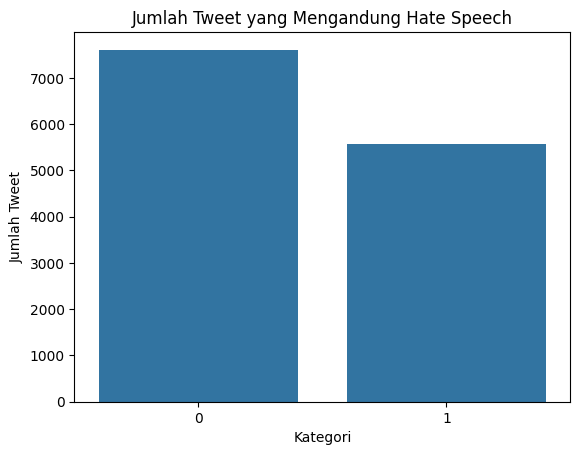

0 = tidak mengandung hate speech ; 1 = mengandung hate speech
 
keterangan jumlah data


0    7608
1    5561
Name: HS, dtype: int64

In [9]:
plt.title("Jumlah Tweet yang Mengandung Hate Speech")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Tweet")
sns.barplot(data.HS.value_counts())
plt.show()
print("0 = tidak mengandung hate speech ; 1 = mengandung hate speech")
print(" ")
print("keterangan jumlah data")
data.HS.value_counts()

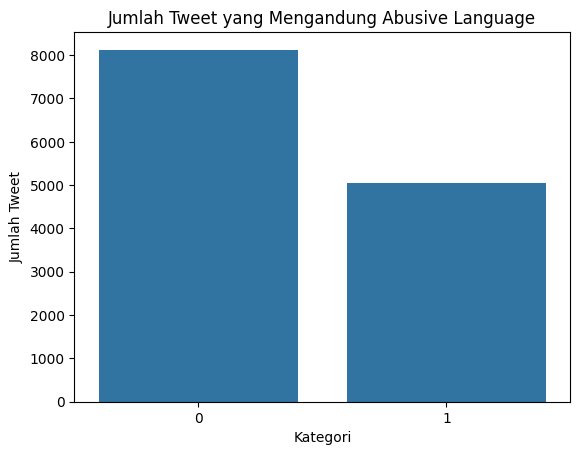

0 = tidak mengandung abusive language ; 1 = mengandung abusive language
 
keterangan jumlah data


0    8126
1    5043
Name: Abusive, dtype: int64

In [10]:
plt.title("Jumlah Tweet yang Mengandung Abusive Language")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Tweet")
sns.barplot(data.Abusive.value_counts())
plt.show()
print("0 = tidak mengandung abusive language ; 1 = mengandung abusive language")
print(" ")
print("keterangan jumlah data")
data.Abusive.value_counts()

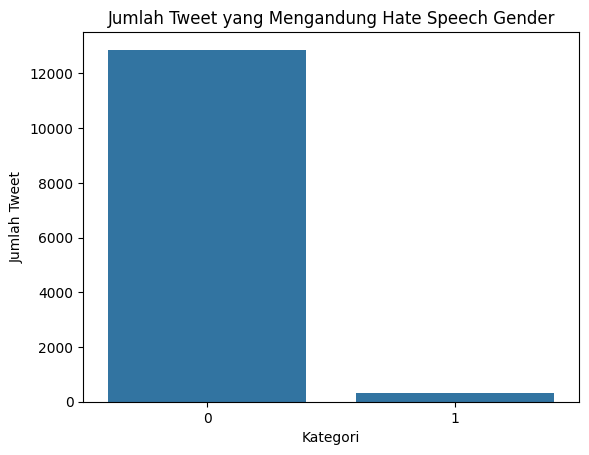

0 = tidak mengandung hate speech gender ; 1 = mengandung hate speech gender
 
keterangan jumlah data


0    12863
1      306
Name: HS_Gender, dtype: int64

In [11]:
plt.title("Jumlah Tweet yang Mengandung Hate Speech Gender")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Tweet")
sns.barplot(data.HS_Gender.value_counts())
plt.show()
print("0 = tidak mengandung hate speech gender ; 1 = mengandung hate speech gender")
print(" ")
print("keterangan jumlah data")
data.HS_Gender.value_counts()


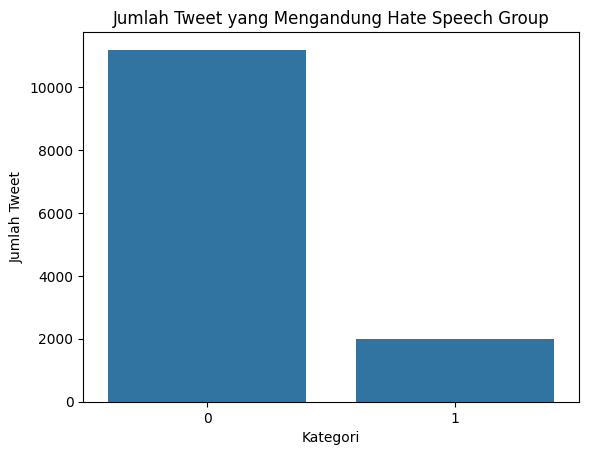

0 = tidak mengandung hate speech group ; 1 = mengandung hate speech group
 
keterangan jumlah data


0    11183
1     1986
Name: HS_Group, dtype: int64

In [12]:
plt.title("Jumlah Tweet yang Mengandung Hate Speech Group")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Tweet")
sns.barplot(data.HS_Group.value_counts())
plt.show()
print("0 = tidak mengandung hate speech group ; 1 = mengandung hate speech group")
print(" ")
print("keterangan jumlah data")
data.HS_Group.value_counts()


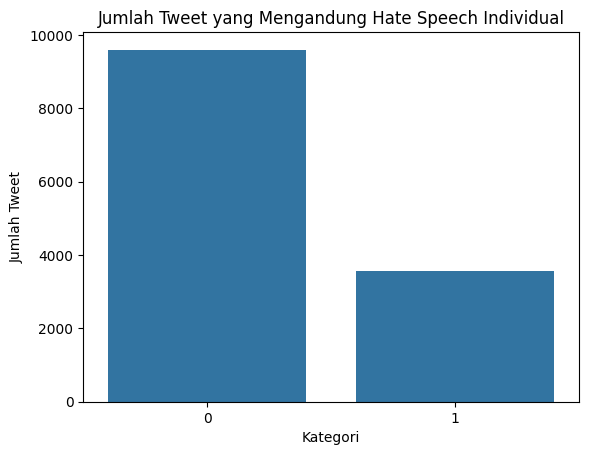

0 = tidak mengandung hate speech individual ; 1 = mengandung hate speech individual
 
keterangan jumlah data


0    9594
1    3575
Name: HS_Individual, dtype: int64

In [13]:
plt.title("Jumlah Tweet yang Mengandung Hate Speech Individual")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Tweet")
sns.barplot(data.HS_Individual.value_counts())
plt.show()
print("0 = tidak mengandung hate speech individual ; 1 = mengandung hate speech individual")
print(" ")
print("keterangan jumlah data")
data.HS_Individual.value_counts()


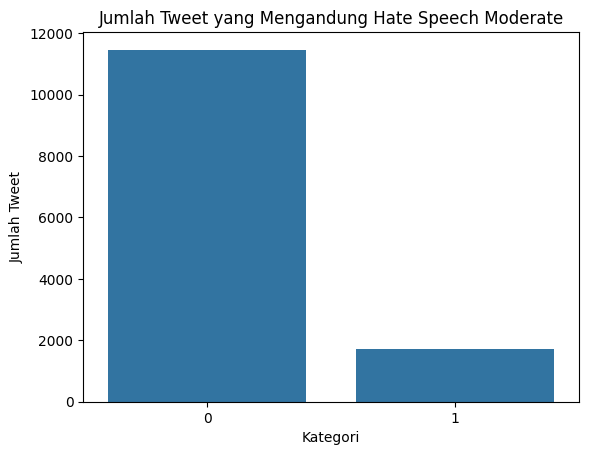

0 = tidak mengandung hate speech moderate ; 1 = mengandung hate speech moderate
 
keterangan jumlah data


0    11464
1     1705
Name: HS_Moderate, dtype: int64

In [14]:
plt.title("Jumlah Tweet yang Mengandung Hate Speech Moderate")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Tweet")
sns.barplot(data.HS_Moderate.value_counts())
plt.show()
print("0 = tidak mengandung hate speech moderate ; 1 = mengandung hate speech moderate")
print(" ")
print("keterangan jumlah data")
data.HS_Moderate.value_counts()


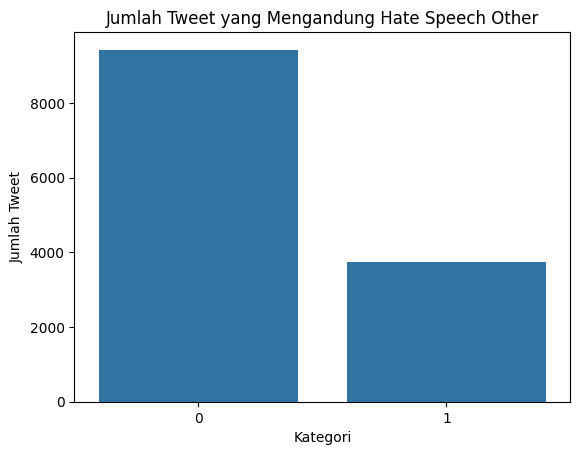

0 = tidak mengandung hate speech other ; 1 = mengandung hate speech other
 
keterangan jumlah data


0    9429
1    3740
Name: HS_Other, dtype: int64

In [15]:
plt.title("Jumlah Tweet yang Mengandung Hate Speech Other")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Tweet")
sns.barplot(data.HS_Other.value_counts())
plt.show()
print("0 = tidak mengandung hate speech other ; 1 = mengandung hate speech other")
print(" ")
print("keterangan jumlah data")
data.HS_Other.value_counts()


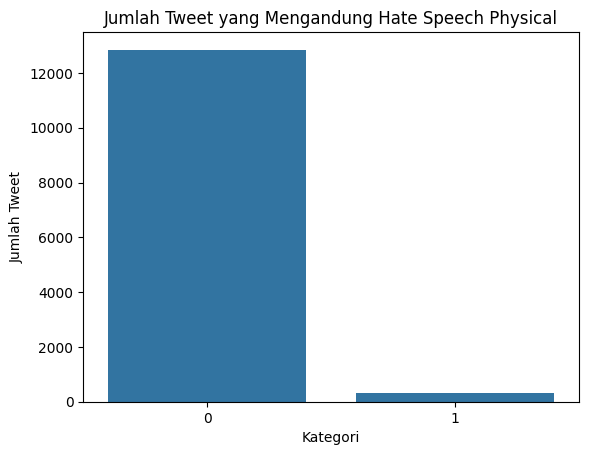

0 = tidak mengandung hate speech physical ; 1 = mengandung hate speech physical
 
keterangan jumlah data


0    12846
1      323
Name: HS_Physical, dtype: int64

In [16]:
plt.title("Jumlah Tweet yang Mengandung Hate Speech Physical")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Tweet")
sns.barplot(data.HS_Physical.value_counts())
plt.show()
print("0 = tidak mengandung hate speech physical ; 1 = mengandung hate speech physical")
print(" ")
print("keterangan jumlah data")
data.HS_Physical.value_counts()


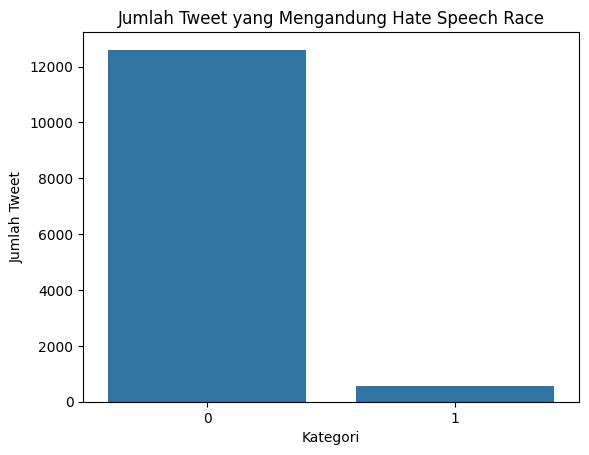

0 = tidak mengandung hate speech race ; 1 = mengandung hate speech race
 
keterangan jumlah data


0    12603
1      566
Name: HS_Race, dtype: int64

In [17]:
plt.title("Jumlah Tweet yang Mengandung Hate Speech Race")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Tweet")
sns.barplot(data.HS_Race.value_counts())
plt.show()
print("0 = tidak mengandung hate speech race ; 1 = mengandung hate speech race")
print(" ")
print("keterangan jumlah data")
data.HS_Race.value_counts()


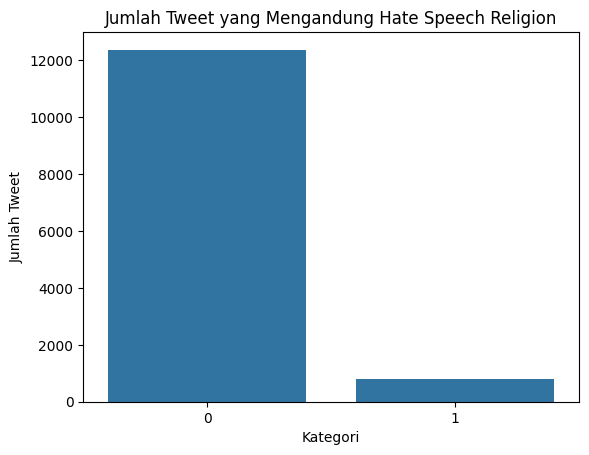

0 = tidak mengandung hate speech religion ; 1 = mengandung hate speech religioin
 
keterangan jumlah data


0    12376
1      793
Name: HS_Religion, dtype: int64

In [18]:
plt.title("Jumlah Tweet yang Mengandung Hate Speech Religion")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Tweet")
sns.barplot(data.HS_Religion.value_counts())
plt.show()
print("0 = tidak mengandung hate speech religion ; 1 = mengandung hate speech religioin")
print(" ")
print("keterangan jumlah data")
data.HS_Religion.value_counts()


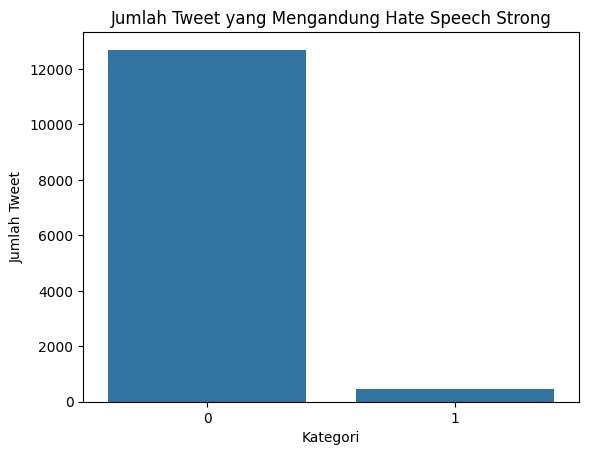

0 = tidak mengandung hate speech strong ; 1 = mengandung hate speech strong
 
keterangan jumlah data


0    12696
1      473
Name: HS_Strong, dtype: int64

In [19]:
plt.title("Jumlah Tweet yang Mengandung Hate Speech Strong")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Tweet")
sns.barplot(data.HS_Strong.value_counts())
plt.show()
print("0 = tidak mengandung hate speech strong ; 1 = mengandung hate speech strong")
print(" ")
print("keterangan jumlah data")
data.HS_Strong.value_counts()


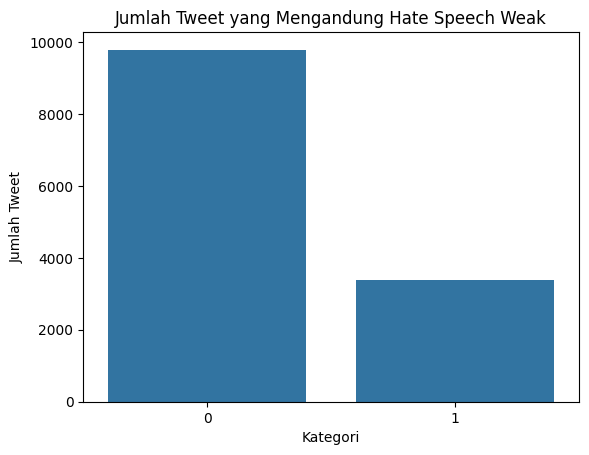

0 = tidak mengandung hate speech weak ; 1 = mengandung hate speech weak
 
keterangan jumlah data


0    9786
1    3383
Name: HS_Weak, dtype: int64

In [20]:
plt.title("Jumlah Tweet yang Mengandung Hate Speech Weak")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Tweet")
sns.barplot(data.HS_Weak.value_counts())
plt.show()
print("0 = tidak mengandung hate speech weak ; 1 = mengandung hate speech weak")
print(" ")
print("keterangan jumlah data")
data.HS_Weak.value_counts()

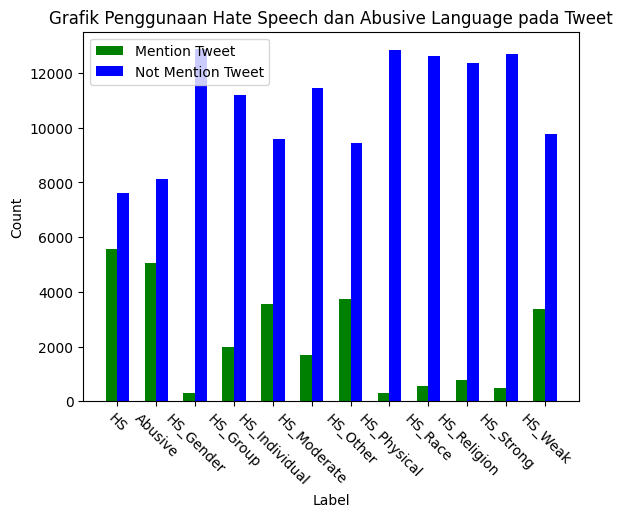

In [28]:
label = ["HS", "Abusive", "HS_Gender", "HS_Group", "HS_Individual", "HS_Moderate", "HS_Other", "HS_Physical", "HS_Race", "HS_Religion", "HS_Strong", "HS_Weak"]
mention_tweet = [5561, 5043,  306, 1986, 3575, 1705, 3740, 323, 566, 793, 473, 3383]
notmention_tweet = [7608, 8126, 12863, 11183, 9594, 11464, 9429, 12846, 12603, 12376, 12696, 9786]

index = np.arange(12)
width = 0.3

plt.bar(index, mention_tweet, width, color='green', label='Mention Tweet')
plt.bar(index+width, notmention_tweet, width, color='blue', label='Not Mention Tweet')
plt.title("Grafik Penggunaan Hate Speech dan Abusive Language pada Tweet")

plt.ylabel("Count")
plt.xlabel("Label")
plt.xticks(index+ width/2, label)
plt.xticks (rotation=-45)

plt.legend(loc='best')
plt.show()